#### Задача 1. 

Выберите любую картинку и с помощью библиотеки Pillow

- примените к ней любой фильтр
- отразите ее горизонтально (погуглите, как)
- уменьшите ее до размера 32х32 пикселя
- сохраните ее в формате ico

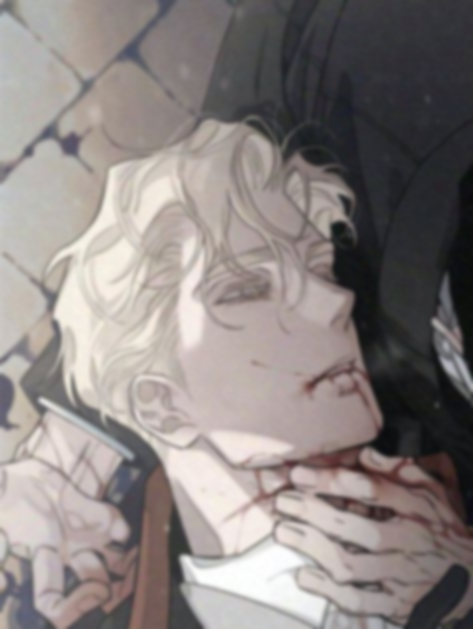

In [7]:
from PIL import Image, ImageFilter

test_img = Image.open('meine_kek.jpg')
new = test_img.filter(ImageFilter.GaussianBlur)
new

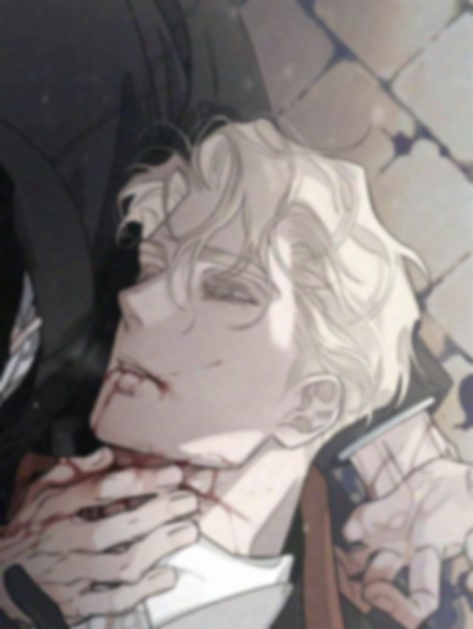

In [12]:
conv = new.transpose(Image.FLIP_LEFT_RIGHT)
conv

In [15]:
conv.thumbnail((32, 32))
conv

In [16]:
conv.save('newpy.ico')

#### Задача 2. 

Выберите любую картинку достаточно большого размера и обрежьте ее по краям таким образом, чтобы она стала размера 256х256 пикселей.

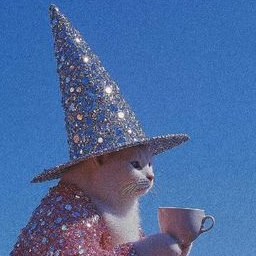

In [25]:
from PIL import Image

# filname = input('name: ')
img = Image.open('me_buddy.jpg')
new_v = img.crop((40, 20, 296, 276))
new_v

#### Задача 3. 

Напишите скрипт, который будет конвертировать любые картинки формата .jpg (расширение может быть написано несколькими разными способами) в .png. 

In [ ]:
from PIL import Image

def converterspell(route):
    types = ['.jpeg', '.JPEG', '.JPG', '.jpg']
    for item in types:
        if not route.endswith(item):
            print('FALSE YO BRO')
            return
    try:
        Image.open(route).save('converted.png', 'png')
    except IOError:
        print('BLBLLBLBL')

pipa = 'me_buddy.jpg'
converterspell(pipa)

#### Задача 4.

Сделайте интерактивную карту Москвы и разместите на ней маркер для РГГУ.

In [54]:
import folium
from folium import plugins

map = folium.Map(location=[55.7, 37.5], zoom_start=10)
folium.Marker(location=[55.77749, 37.59268], 
              popup='<b>RUSSIAN STATE FOR HUMANITIES</b>', 
              tooltip='RSUH',
              icon=folium.Icon(icon='university', color='cadetblue', prefix='fa')).add_to(map) #задаем параметры иконки

# (37.36 -> 37.85)
formatter = 'function(num) {return L.Util.formatNum(num, 5);};' #проще копировать
mouseposition = plugins.MousePosition(position='topright', 
                                      separator=' Долгота: ',
                                      num_digits=20,
                                      prefix=' Широта: ', 
                                      lat_formatter=formatter,
                                      lng_first=formatter) #строка, которая будет писать где щас мышка
map.add_child(mouseposition)
map


#### Задача 5. 

Выберите любой признак на WALS и перенесите карту для него оттуда в python с помощью folium.

In [60]:
import json
cluster = json.load(open('2.geojson'))
map = folium.Map(location=[50, 90], zoom_start=2)
folium.GeoJson(cluster, zoom_on_click=True, marker=folium.Marker(icon=folium.Icon(color='orange', icon='envelope-open', prefix='fa'))).add_to(map)
map